In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data/Real-Data/real_combine.csv")

### data preprocessing

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


<AxesSubplot:>

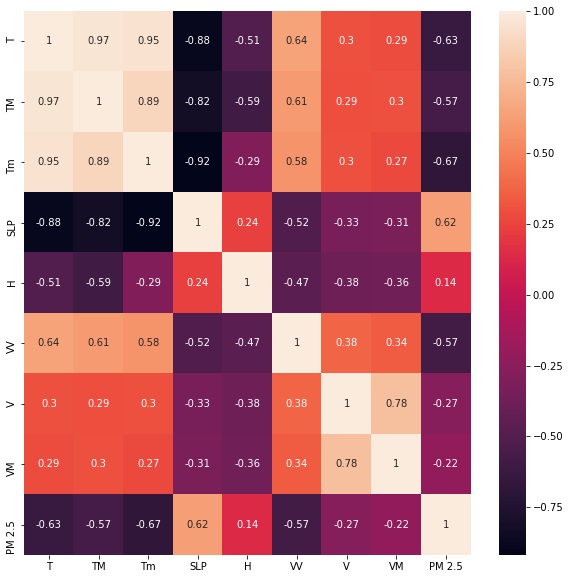

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

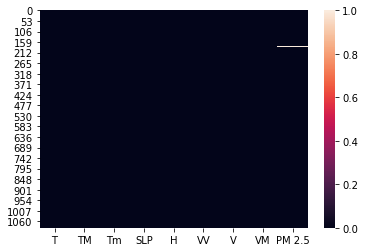

In [9]:
sns.heatmap(data.isnull())

In [10]:
data=data.dropna()

<AxesSubplot:>

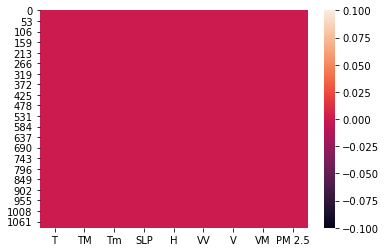

In [11]:
sns.heatmap(data.isnull())

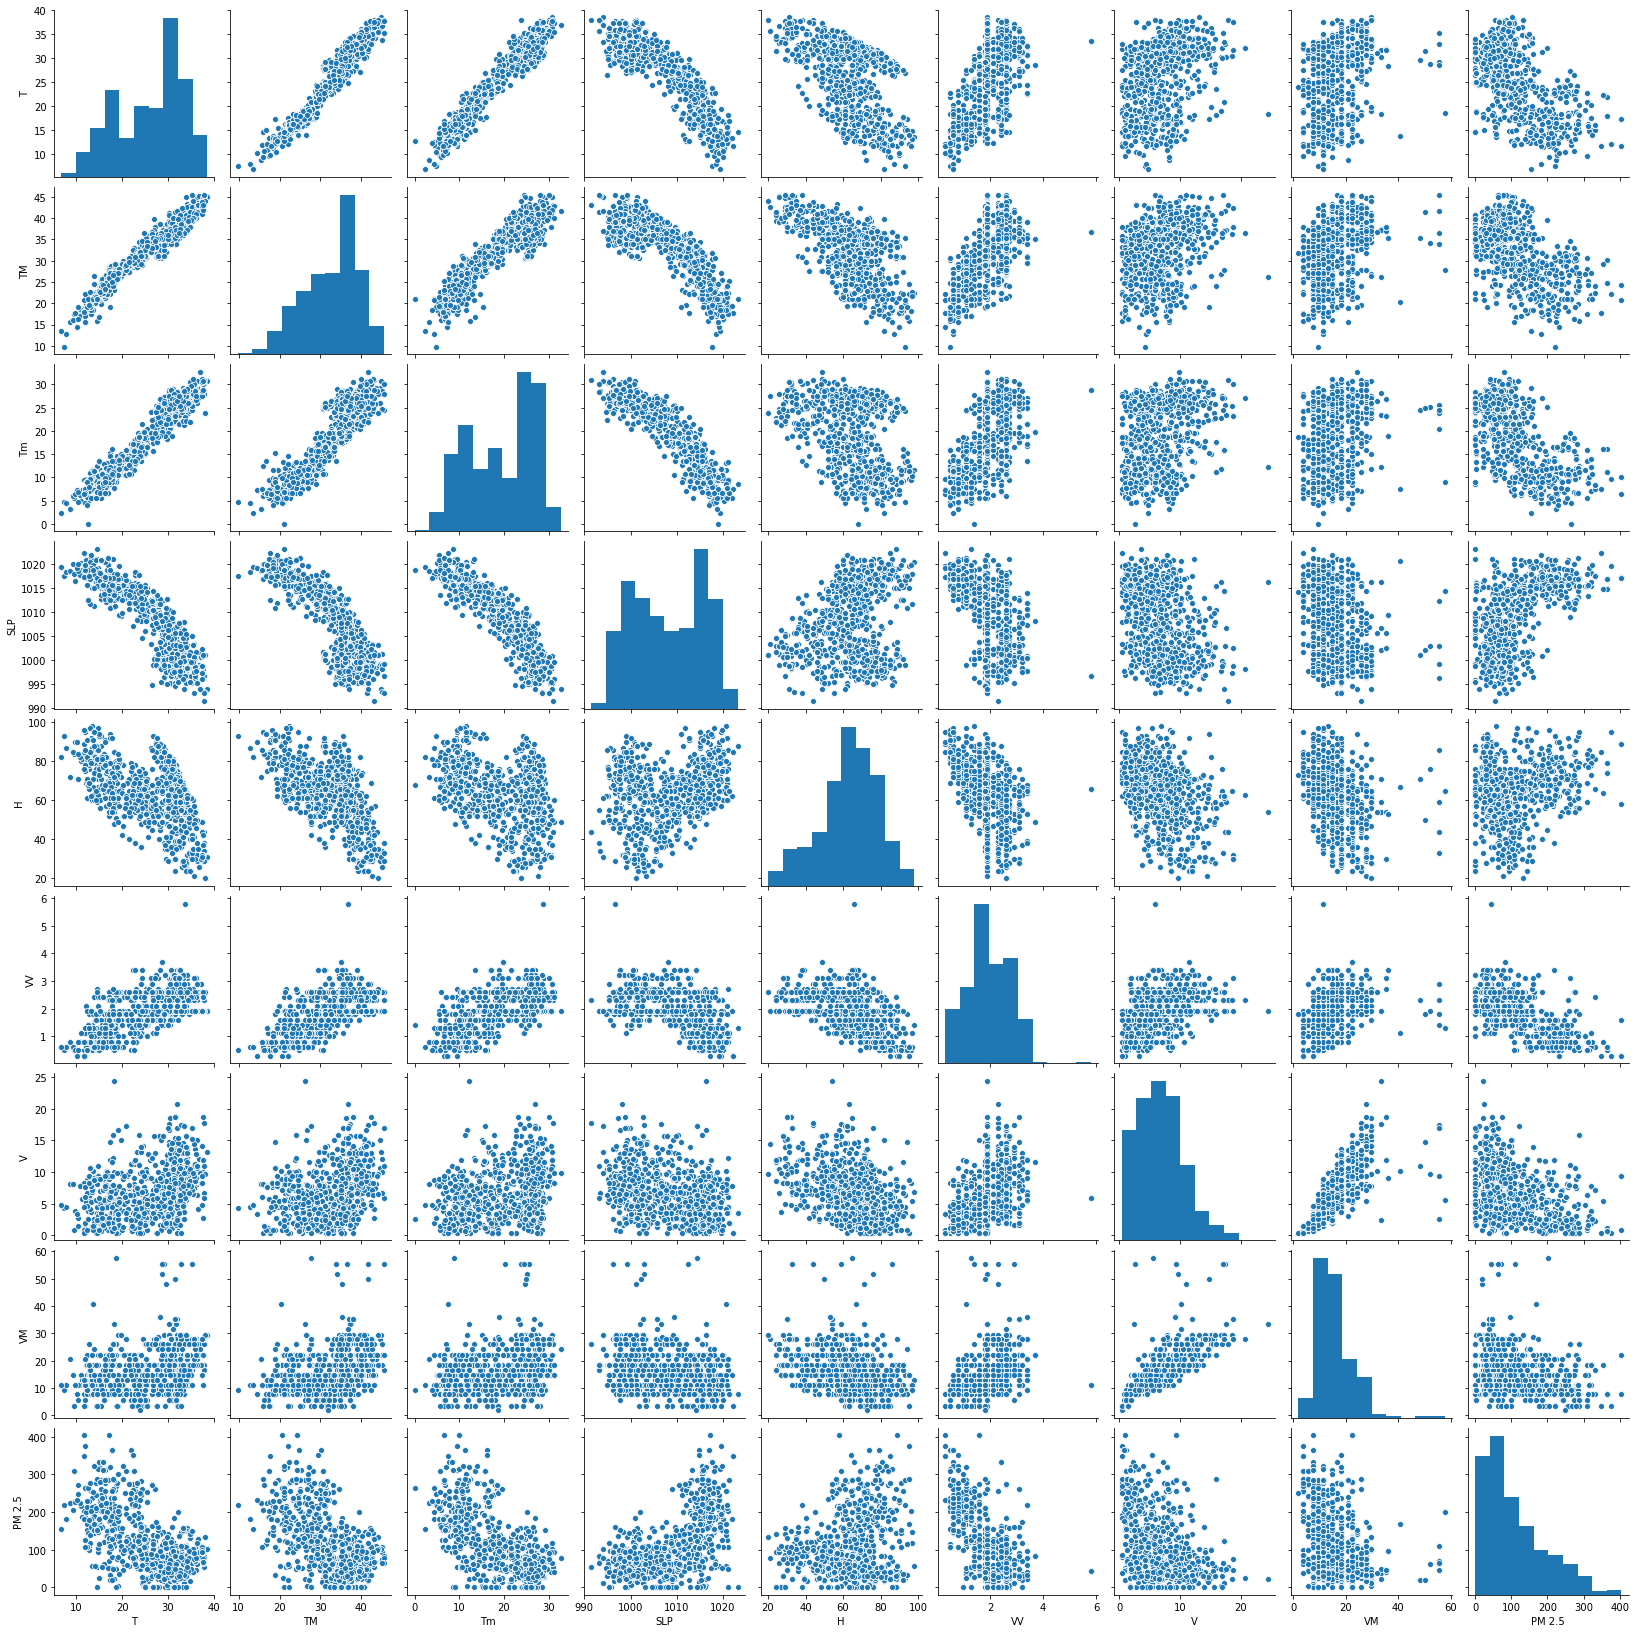

In [12]:
sns.pairplot(data=data)

In [13]:
X=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [14]:
X

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [15]:
y

0       219.720833
1       182.187500
2       154.037500
3       223.208333
4       200.645833
           ...    
1088    288.416667
1089    256.833333
1090    169.000000
1091    186.041667
1092    185.583333
Name: PM 2.5, Length: 1092, dtype: float64

### Feature Selection

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [20]:
model.feature_importances_


array([0.19115416, 0.10068159, 0.17086976, 0.16393452, 0.0891349 ,
       0.18721704, 0.05466568, 0.04234234])

<AxesSubplot:>

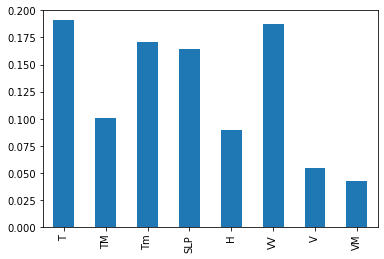

In [26]:
pd.Series(model.feature_importances_,index=X.columns).plot(kind="bar")

<AxesSubplot:>

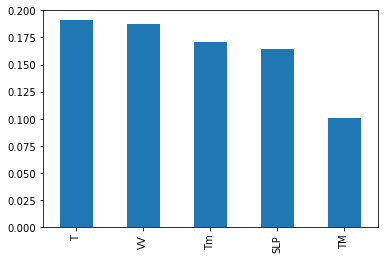

In [28]:
pd.Series(model.feature_importances_,index=X.columns).nlargest(5).plot(kind="bar")

### Decision Tree Regressor